In [2]:
#import packages to do EDA
import pandas as pd
import numpy as np

import os
import gc

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from lime.lime_tabular import LimeTabularExplainer
import joblib
import shap
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.metrics import classification_report

In [2]:
with open('./data/train_vector.pkl', 'rb') as f:
    X = pickle.load(f)

with open('./data/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

with open('./data/yvalues.pkl', 'rb') as f:
    y = pickle.load(f)

#### testing purpose only
traindata=5000
X = X.toarray()[:traindata,:]
y=y[:traindata]
print(X.shape,y.shape)

In [3]:
df_train = pd.DataFrame(X.toarray(), columns =feature_names)

In [4]:
#split data only train and test. 
X_tr, X_test, y_tr, y_test = train_test_split(df_train, y, test_size=0.33, stratify=y, random_state=42)
X_train,X_cv,y_train,y_cv =train_test_split(X_tr,y_tr,test_size=0.33,stratify=y_tr,random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [6]:
#load NN model
from keras.models import load_model
filename='./results/NN-model.hdf5'
model = load_model(filename)

In [7]:
y_pred = model.predict(X_test, batch_size=1024).reshape(-1, 1)

In [8]:
y_pred =(y_pred>0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     93287
           1       0.17      0.68      0.27      8192

    accuracy                           0.70    101479
   macro avg       0.57      0.69      0.54    101479
weighted avg       0.90      0.70      0.77    101479



In [9]:
#credit:https://morioh.com/p/06e5807f8dba
#since LIME needs probabilities, and Keras doesn't have predict_proba method. need to build on top of predict 
def prob(data):
    y_pred=model.predict(data).reshape(-1, 1)
    y_pred =(y_pred>0.5)
    return np.hstack((1-y_pred,y_pred))

In [10]:
class_names = [0, 1]

In [11]:
gc.enable()
del X, X_tr,y_tr
gc.collect()

928

#### SHAP

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.regularizers import l2
import random as rn

In [13]:
os.environ['PYTHONHASHSEED'] = '0'
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#clear the session 
tf.keras.backend.clear_session()

#initializer
initializer = tf.keras.initializers.glorot_normal(seed=0)
#initializer =tf.keras.initializers.he_normal(seed=0)
act_layer = tf.keras.layers.LeakyReLU(alpha=0.065)
l2_reg =l2(0.0011)
#Input Layer: Categorical features, Numerical features
input_layer = Input(shape=(X_train.shape[1],),name='input_layer')

#flat the input layer
flat_layer = Flatten()(input_layer)   

# Dense layer after zeroth layerr
Dense1 =Dense(32, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(input_layer)
#batch Normalization
bn1 = BatchNormalization()(Dense1)
# dropout after batch norm 1
drop1 =Dropout(0.25)(bn1)

# Dense layer after drop1
Dense2 =Dense(64, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop1)
#batch Normalization
bn2 = BatchNormalization()(Dense2)
# dropout after batch norm 2
drop2 =Dropout(0.25)(bn2)

# Dense layer after drop2
Dense3 =Dense(128, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop2)
#batch Normalization
bn3 = BatchNormalization()(Dense3)
# dropout after batch norm 3
drop3 =Dropout(0.35)(bn3)

# Dense layer after drop 3
Dense4 =Dense(256, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop3)
#batch Normalization
bn4 = BatchNormalization()(Dense4)
# dropout after batch norm 4
drop4 =Dropout(0.4)(bn4)

# Dense layer after drop 4
Dense5 =Dense(512, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop4)
#batch Normalization
bn5 = BatchNormalization()(Dense5)
# dropout after batch norm 5
drop5 =Dropout(0.4)(bn5)

# Dense layer after drop5
Dense6 =Dense(1024, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop5)
#batch Normalization
bn6 = BatchNormalization()(Dense6)
# dropout after batch norm 6
drop6 =Dropout(0.5)(bn6)

# Dense layer after drop6
Dense7 =Dense(512, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop6)
#batch Normalization
bn7 = BatchNormalization()(Dense7)
# dropout after batch norm 7
drop7 =Dropout(0.5)(bn7)

# Dense layer after drop7
Dense8 =Dense(128, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop7)
#batch Normalization
bn8 = BatchNormalization()(Dense8)
# dropout after batch norm 8
drop8 =Dropout(0.25)(bn8)


# Dense layer after dropout 8 
Dense9 =Dense(32, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop8)
#batch Normalization
bn9 = BatchNormalization()(Dense9)
# dropout after batch norm 9
drop9 =Dropout(0.25)(bn9)

# Dense layer after dropout 9
Dense10 =Dense(16, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop9)
#batch Normalization
bn10 = BatchNormalization()(Dense10)
# dropout after batch norm 10
drop10 =Dropout(0.25)(bn10)

# Dense layer after dropout 10
Dense11 =Dense(8, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop10)
#batch Normalization
bn11 = BatchNormalization()(Dense11)
# dropout after batch norm 11
drop11 =Dropout(0.25)(bn11)

# Dense layer after dropout 11 
Dense12 =Dense(4, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop11)

#output layer
output =Dense(1, activation='sigmoid',name='output')(Dense12)

#adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00079, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adam')

#finally define the Model
model = Model(inputs=input_layer,outputs=output)

#compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics=['accuracy'])

#summary
#print(model.summary())

In [14]:
import tensorflow.keras
import sklearn.metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score

class CustomMetrics(tf.keras.callbacks.Callback):
    def __init__(self,validation_data):
        super(CustomMetrics, self).__init__()
        self.X_val = validation_data[0]
        self.y_val = validation_data[1]
        self.auc =[]
    def on_train_begin(self, logs={}):
        self.customMetrics={'val_accuracy':[], 'roc_auc':[],'val_loss':[],'loss':[]}
    def on_epoch_end(self, epoch, logs={}):
        #If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training.
        if logs.get('loss') is None:
            if np.isnan(logs.get('loss')) or np.isinf(logs.get('loss')):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True
        elif logs.get('loss')<=0.01:
            print('loss has reduced below 001. Hence stop training!!!')
            self.model.stop_training = True
        elif np.round(logs.get('val_accuracy'),2)>=0.98:
            print('validation accuracy reached over 98%. Hence stop training to avoid overfitting!!!')
            self.model.stop_training = True

        self.customMetrics['val_loss'].append(logs.get('val_loss'))
        self.customMetrics['loss'].append(logs.get('loss'))
        self.customMetrics['val_accuracy'].append(logs.get('val_accuracy'))
        try:
            y_pred = np.asarray(self.model.predict(self.X_val))
            y_true = self.y_val        
            self.customMetrics['roc_auc'].append(sklearn.metrics.roc_auc_score(y_true, y_pred))
        except ValueError:
            pass
        
        self.auc.append(roc_auc_score(y_true,y_pred))
        print('-\tauc  : {:.4f}'.format(roc_auc_score(y_true,y_pred)))
        return
metrics=CustomMetrics(validation_data=(X_cv,np.array(y_cv)))
#metrics=CustomMetrics()

In [15]:
def changeLearningRate(epoch,lr): 
    #val_acc = metrics.customMetrics['val_acc'] 
    changed = lr #default condition
    if epoch <= 1: 
        changed = lr
    #Cond2. For every 3rd epoch, decay your learning rate by 4%.
    elif epoch > 1 and epoch%3==0:
        changed = lr*(1-0.050)
        print('reducing learing rate with 5% on every 3rd epoch {} '.format(changed))
    else:
        changed = lr*(1-0.03)
        print('reducing learing rate with 3% ~~> {}'.format(changed))
    return changed

In [16]:
%load_ext tensorboard
#%reload_ext tensorboard
logs_base_dir = "/logs/fit/NN/"
os.makedirs(logs_base_dir, exist_ok=True)

In [17]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=[0,1], y=y_train)
d_class_weights = dict(enumerate(class_weights))
d_class_weights


{0: 0.5439096274931637, 1: 6.193512203876526}

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,LearningRateScheduler
import datetime

#learning rate and EarlyStop
lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=5, verbose=1)
    
#log directory for tensor board
logdir=os.path.join(os.getcwd()+ "/logs/fit/NN/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=0,profile_batch = '500,520')
#saving model 
filepath=os.path.join(os.getcwd()+ "/model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5")
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')
    
#model fit
model_history=model.fit(X_train,y_train, class_weight=d_class_weights,
                    validation_data=(X_cv,y_cv),epochs=30, batch_size=1024,
                    callbacks=[tensorboard_callback,metrics,lrschedule,earlystop,checkpoint])


Epoch 00001: LearningRateScheduler setting learning rate to 0.0007900000200606883.
Epoch 1/30
135/135 [==============================] - ETA: 0s - loss: 3.2404 - accuracy: 0.5254-	auc  : 0.5997

Epoch 00001: val_accuracy improved from -inf to 0.18349, saving model to C:\DS\1. AAIC\001.0ML.Project\26.repayloaan/model_save\weights-01-0.1835.hdf5
135/135 [==============================] - 19s 125ms/step - loss: 3.2404 - accuracy: 0.5254 - val_loss: 3.0751 - val_accuracy: 0.1835 - lr: 7.9000e-04

Epoch 00002: LearningRateScheduler setting learning rate to 0.0007900000200606883.
Epoch 2/30
135/135 [==============================] - ETA: 0s - loss: 2.8862 - accuracy: 0.4692-	auc  : 0.4935

Epoch 00002: val_accuracy improved from 0.18349 to 0.47339, saving model to C:\DS\1. AAIC\001.0ML.Project\26.repayloaan/model_save\weights-02-0.4734.hdf5
135/135 [==============================] - 16s 118ms/step - loss: 2.8862 - accuracy: 0.4692 - val_loss: 2.7014 - val_accuracy: 0.4734 - lr: 7.9000e-04
r

In [19]:
X_train = np.vstack((X_train,X_cv))
y_train = np.concatenate([y_train,y_cv],axis=0)

In [20]:
gc.enable()
del X_cv
gc.collect()

10103

In [21]:
def f(X):
    return model.predict([X[:,i] for i in range(X.shape[1])]).flatten()

In [25]:
kernel_explainer = shap.KernelExplainer(model.predict, X_test[:100])
kernel_shap_values = kernel_explainer.shap_values(X_test[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

In [117]:
expected_value = kernel_explainer.expected_value

In [28]:
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer Expected Value: {expected_value}")
idx = 100 # row selected for fast runtime
select = range(idx)
features = X_test.iloc[select]
feature_display = df_train.loc[features.index]

Explainer Expected Value: [0.43866191]


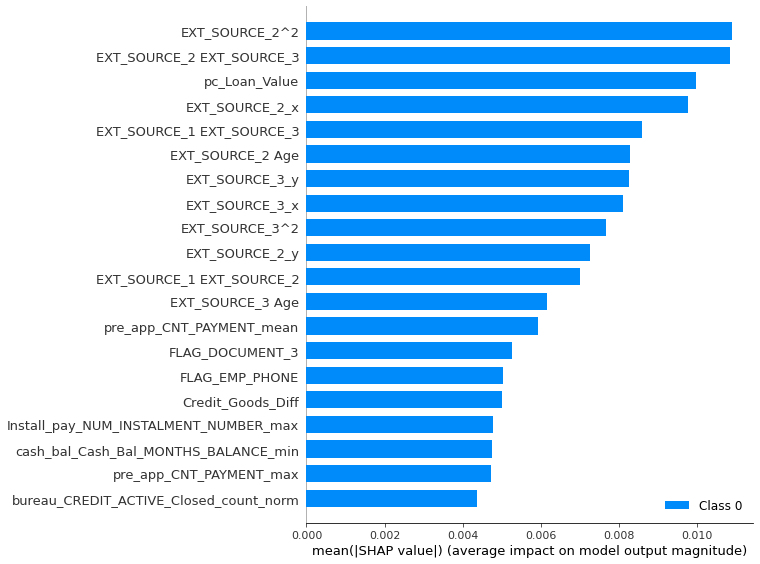

In [115]:
#shap.initjs()
shap.summary_plot(kernel_shap_values,feature_display,plot_type='bar')

In [3]:
#shap.initjs() # run to show the plot
shap.force_plot(kernel_explainer.expected_value, shap_values=kernel_shap_values[0][0], features=feature_display.iloc[0,:])

NameError: name 'kernel_explainer' is not defined

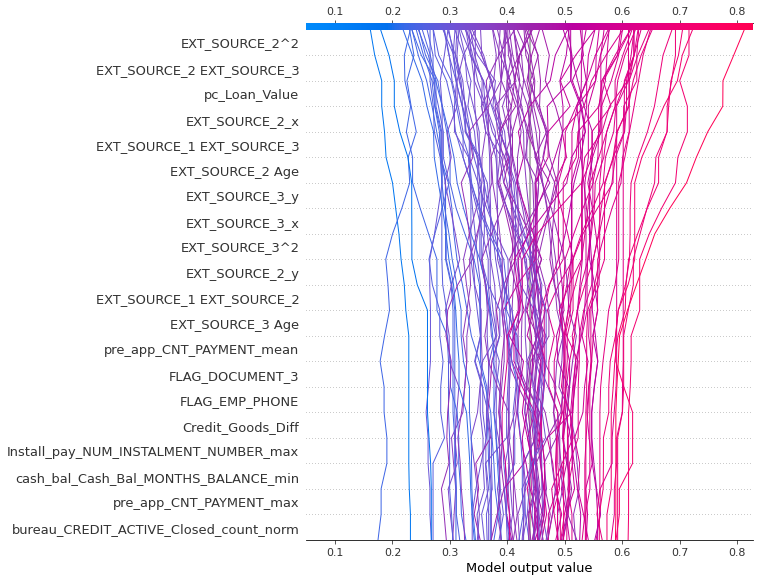

In [114]:
shap.decision_plot(expected_value, kernel_shap_values[0], feature_display)

### Summary